In [1]:
import os
import datetime
import copy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

import Tracab as tracab
import Tracking_Visuals as vis
import Tracking_Velocities as vel
import Tracking_Fatigue as fatigue
import helpers

import importlib
importlib.reload(tracab)
importlib.reload(helpers)
importlib.reload(vis)

<module 'Tracking_Visuals' from '/Users/jeffbalkanski/research_soccer/SoccerTrackingData3/Tracking_Visuals.py'>

In [3]:
# config
current_dir = os.path.dirname(os.getcwd())
dir_path = os.path.join(current_dir, 'Aalborg_Jeff')
LEAGUE = 'DSL'

# all games data
data_dict = {}
all_Aalborg_games = [x for x, _, _ in os.walk(dir_path) if x.count('_TracDAT')]

In [5]:
all_Aalborg_games[:1]

['/Users/jeffbalkanski/research_soccer/Aalborg_Jeff/984554/984554_TracDAT']

## Read a game

In [9]:
# read
fname = all_Aalborg_games[3].split('/')[-2]
fpath = all_Aalborg_games[3]
frames_tb, match_tb, team1_players, team0_players = tracab.read_tracab_match_data(LEAGUE, fpath, fname, verbose=True)

Reading match metadata
Reading match tracking data
Timestamping frames
Measuring velocities
home goalkeeper(s):  [1]
away goalkeeper(s):  [1]
0 75810
75811 148149


In [27]:
alive = pd.Series([x.ball_status for x in frames_tb])
alive.value_counts()

Alive    85454
Dead     62697
dtype: int64

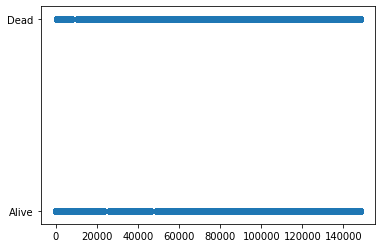

In [34]:
plt.scatter(alive.index, alive.values)